In [1]:
import keras
import tensorflow
import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd

In [2]:
data = []
labels = []
width,height=150,150

imagePaths = list(paths.list_images('C:\Jupyters\envr\Scripts\diabetic_retinopathy\colored_images'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    #print(imagePath)
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 150, 150, 3)
(3662, 5)


In [3]:
test_ratio = 0.25

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2746, 150, 150, 3)
Test images: (916, 150, 150, 3)
Train label: (2746, 5)
Test label: (916, 5)


In [4]:
from keras.models import Model
from keras.layers import Input 
from keras.applications.inception_v3 import InceptionV3
from keras import layers

INIT_LR = 1e-4
EPOCHS = 25
BS = 32

InceptionV3 = InceptionV3(weights="C:\Jupyters\envr\Scripts\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5", include_top=False,input_shape= (150,150,3))

model = Sequential()
model.add(InceptionV3)
model.add(layers.Flatten())
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(5, activation = 'sigmoid'))

opt = Adam(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 100)               1843300   
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 23,646,589
Trainable params: 23,612,157
Non-trainable params: 34,432
_________________________________________________________________


In [5]:
filepath='best_model__ince.h5'
h = model.fit(x_train,y_train,epochs=25);
model.save(filepath)

Epoch 1/25
86/86 [==============================] - 215s 2s/step - loss: 0.2834 - accuracy: 0.7043
Epoch 2/25
86/86 [==============================] - 208s 2s/step - loss: 0.1767 - accuracy: 0.8052
Epoch 3/25
86/86 [==============================] - 208s 2s/step - loss: 0.1276 - accuracy: 0.8765
Epoch 4/25
86/86 [==============================] - 453s 5s/step - loss: 0.0758 - accuracy: 0.9395
Epoch 5/25
86/86 [==============================] - 197s 2s/step - loss: 0.0522 - accuracy: 0.9607
Epoch 6/25
86/86 [==============================] - 207s 2s/step - loss: 0.0325 - accuracy: 0.9763
Epoch 7/25
86/86 [==============================] - 245s 3s/step - loss: 0.0313 - accuracy: 0.9745
Epoch 8/25
86/86 [==============================] - 192s 2s/step - loss: 0.0370 - accuracy: 0.9694
Epoch 9/25
86/86 [==============================] - 206s 2s/step - loss: 0.0313 - accuracy: 0.9723
Epoch 10/25
86/86 [==============================] - 210s 2s/step - loss: 0.0268 - accuracy: 0.9763
Epoch 11/

In [9]:
mild = []
No_DR = []
Moderate = []
Severe = []
Proliferate_DR = []

mild_labels = []
No_DR_labels = []
Moderate_labels = []
Severe_labels = []
Proliferate_DR_labels = []

width,height=150,150
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    if(label == 'Mild'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        mild.append(image)
        mild_labels.append(0)
    if(label == 'No_DR'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        No_DR.append(image)
        No_DR_labels.append(2)
    if(label == 'Moderate'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Moderate.append(image)
        Moderate_labels.append(1)
    if(label == 'Severe'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Severe.append(image)
        Severe_labels.append(4)
    if(label == 'Proliferate_DR'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Proliferate_DR.append(image)
        Proliferate_DR_labels.append(3)
    
mild = np.array(mild, dtype="float32")
No_DR = np.array(No_DR, dtype="float32")
Moderate = np.array(Moderate, dtype="float32")
Severe = np.array(Severe, dtype="float32")
Proliferate_DR = np.array(Proliferate_DR, dtype="float32")

86/86 [==============================] - 27s 315ms/step

Trainig Accuracy Score:- 98.1427530954115

Testing Accuracy Score:- 77.62008733624454

Traning Graph:- 
 


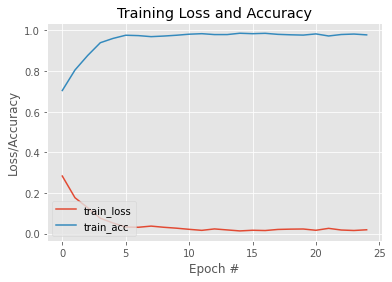

In [10]:
 from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics

predIdxs = model.predict(x_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = model.predict(x_train, batch_size=BS)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainScore=accuracy_score(trainpredIdxs,y_train.argmax(axis=1))*100
Score=accuracy_score(predIdxs,y_test.argmax(axis=1))*100

print("\nTrainig Accuracy Score:-",trainScore)
print("\nTesting Accuracy Score:-",Score)
print("\nTraning Graph:- \n ")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

In [11]:
extract = Model(model.inputs, model.layers[-3].output)

#del(data)
#del(labels)
feat_train  = extract.predict(x_train)  
feat_test = extract.predict(x_test)      

print(feat_train.shape)

29/29 [==============================] - 9s 321ms/step
(2746, 18432)


## SVM

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_train,np.argmax(y_train,axis=1))

TrainSVMScore=svm.score(feat_train,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScore)

TestSVMScore=svm.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScore)

SVM Training Accuracy Score:- 99.45375091041515

SVM Testing Accuracy Score:- 78.49344978165938


In [19]:
mild_fit = extract.predict(mild)  
No_DR_fit = extract.predict(No_DR)  
Moderate_fit = extract.predict(Moderate)  
Severe_fit = extract.predict(Severe)  
Proliferate_DR_fit = extract.predict(Proliferate_DR)  

mild_svm_score = svm.score(mild_fit,mild_labels)*100
No_DR_svm_score = svm.score(No_DR_fit,No_DR_labels)*100
Moderate_svm_score = svm.score(Moderate_fit,Moderate_labels)*100
Severe_svm_score = svm.score(Severe_fit,Severe_labels)*100
Proliferate_DR_svm_score = svm.score(Proliferate_DR_fit,Proliferate_DR_labels)*100

print("\nSVM Mild Accuracy Score:-",mild_svm_score)
print("\nSVM NO DR Accuracy Score:-",No_DR_svm_score)
print("\nSVM Moderate Accuracy Score:-",Moderate_svm_score)
print("\nSVM Severe Accuracy Score:-",Severe_svm_score)
print("\nSVM Proliferate DR Accuracy Score:-",Proliferate_DR_svm_score)

10/10 [==============================] - 3s 281ms/step

SVM Mild Accuracy Score:- 88.10810810810811

SVM NO DR Accuracy Score:- 99.33518005540166

SVM Moderate Accuracy Score:- 92.992992992993

SVM Severe Accuracy Score:- 81.86528497409327

SVM Proliferate DR Accuracy Score:- 82.71186440677965


## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feat_train,np.argmax(y_train,axis=1))

TrainDecisionScore=clf.score(feat_train,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScore)


TestDecisionScore=clf.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScore)

Decision Tree Training Accuracy Score:- 99.2352512745812

Decision Tree Testing Accuracy Score:- 73.14410480349345


## KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_train,np.argmax(y_train,axis=1))

TrainKNNScore=knn.score(feat_train,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScore)

TestKNNScore=knn.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScore)

KNN Training Accuracy Score:- 98.03350327749453

KNN Testing Accuracy Score:- 74.235807860262


## Gaussian Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(feat_train,np.argmax(y_train,axis=1))

TrainNBScore=gnb.score(feat_train,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",TrainNBScore)

TestNBScore=gnb.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",TestNBScore)


GaussianNaive Bayes Training Accuracy Score:- 98.1427530954115

GaussianNaive Bayes Testing Accuracy Score:- 73.90829694323145


In [13]:
print("--Training Accuracy..")
print("inception Accuracy:- {:.2f} %".format(trainScore))
print("inception-SVM Accuracy:- {:.2f} %".format(TrainSVMScore))
print("inception-DT Accuracy:- {:.2f} %".format(TrainDecisionScore))
print("inception-KNN Accuracy:- {:.2f} %".format(TrainKNNScore))
print("inception-NB Accuracy:- {:.2f} %".format(TrainNBScore))

print("\n--Testing Accuracy..")
print("inception Accuracy:- {:.2f} %".format(Score))
print("inception-SVM Accuracy:- {:.2f} %".format(TestSVMScore))
print("inception-DT Accuracy:- {:.2f} %".format(TestDecisionScore))
print("inception-KNN Accuracy:- {:.2f} %".format(TestKNNScore))
print("inception-NB Accuracy:- {:.2f} %".format(TestNBScore))

--Training Accuracy..
inception Accuracy:- 98.40 %
inception-SVM Accuracy:- 99.24 %
inception-DT Accuracy:- 99.24 %
inception-KNN Accuracy:- 98.03 %
inception-NB Accuracy:- 98.14 %

--Testing Accuracy..
inception Accuracy:- 75.98 %
inception-SVM Accuracy:- 78.60 %
inception-DT Accuracy:- 73.14 %
inception-KNN Accuracy:- 74.24 %
inception-NB Accuracy:- 73.91 %


## inceptionV3 Test Plot

In [14]:
Methods = ['inception-SVM','inception-DT','inception-KNN','inception-NB']
accurasies = [TestSVMScore,TestDecisionScore,TestKNNScore,TestNBScore]

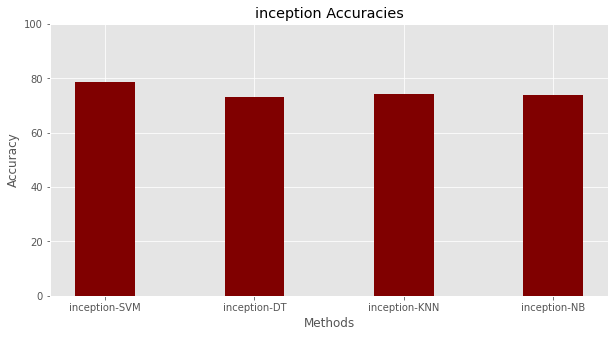

In [15]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Methods, accurasies, color ='maroon',width = 0.4)

plt.ylim(0, 100)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("inception Accuracies")
plt.show()